In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
sns.set(context= 'talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False,'pdf.fonttype':42},palette='colorblind')

In [20]:
data=pd.read_csv('data/11M11D.txt',sep='\t').iloc[1:,:].astype(int)
data.index=data.index.astype(int)/60
data.index.name='Time (hrs)'
data.columns=['%s%s'%(i,j) for i in 'ABCDEFGH' for j in range(1,9) ]
data

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,...,G7,G8,H1,H2,H3,H4,H5,H6,H7,H8
Time (hrs),,,,,,,,,,,,,,,,,,,,,
0.033333,1588,1612,1605,1591,1611,1615,1610,1594,1606,1587,...,1595,1591,1568,1584,1565,1583,1596,1583,1592,1579
0.366667,1581,1481,1601,1576,1590,1589,1571,1565,1585,1575,...,1575,1568,1504,1527,1501,1532,1533,1540,1527,1516
0.700000,1569,1468,1586,1570,1569,1574,1547,1543,1570,1571,...,1566,1547,3888,3891,3893,3901,3920,3919,3928,3911
1.033333,1563,1462,1572,1568,1557,1557,1528,1524,1564,1563,...,1548,1534,3385,3375,3381,3384,3385,3387,3387,3371
1.366667,1557,1453,1559,1571,1543,1557,1520,1509,1560,1559,...,1541,1516,3501,3501,3508,3510,3511,3510,3512,3499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221.383333,2268,2959,4766,5560,6875,12086,11455,1391,2436,2326,...,6816,1398,2397,3547,4554,7706,7925,9139,9632,2495
221.716667,2268,2960,4770,5557,6870,12089,11456,1393,2436,2327,...,6818,1398,2405,3546,4554,7705,7924,9147,9638,2496
222.050000,2267,2958,4768,5555,6870,12086,11461,1392,2434,2326,...,6820,1398,2414,3547,4556,7706,7924,9149,9637,2495


In [4]:
layout=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='Layout')
layout=layout.dropna()
layout.index=layout.Position
layout.drop('Position',axis=1,inplace=True)
layout_dict=layout.to_dict()['Condition']
layout_dict

{'A1': 'A1',
 'A2': 'B1',
 'A3': 'C1',
 'A4': 'D1',
 'A5': 'E1',
 'A6': 'F1',
 'A7': 'G1',
 'A8': 'A9',
 'B1': 'A2',
 'B2': 'B2',
 'B3': 'C2',
 'B4': 'D2',
 'B5': 'E2',
 'B6': 'F2',
 'B7': 'G2',
 'B8': 'B9',
 'C1': 'A3',
 'C2': 'B3',
 'C3': 'C3',
 'C4': 'D3',
 'C5': 'E3',
 'C6': 'F3',
 'C7': 'G3',
 'C8': 'C9',
 'D1': 'A4',
 'D2': 'B4',
 'D3': 'C4',
 'D4': 'D4',
 'D5': 'E4',
 'D6': 'F4',
 'D7': 'G4',
 'D8': 'D9',
 'E1': 'A5',
 'E2': 'B5',
 'E3': 'C5',
 'E4': 'D5',
 'E5': 'E5',
 'E6': 'F5',
 'E7': 'G5',
 'E8': 'E9',
 'F1': 'A6',
 'F2': 'B6',
 'F3': 'C6',
 'F4': 'D6',
 'F5': 'E6',
 'F6': 'F6',
 'F7': 'G6',
 'F8': 'F9',
 'G1': 'A7',
 'G2': 'B7',
 'G3': 'C7',
 'G4': 'D7',
 'G5': 'E7',
 'G6': 'F7',
 'G7': 'G7',
 'G8': 'G9',
 'H1': 'A8',
 'H2': 'B8',
 'H3': 'C8',
 'H4': 'D8',
 'H5': 'E8',
 'H6': 'F8',
 'H7': 'G8'}

In [5]:
ODs=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='ODs',index_col=0)
ODs

,OD1,OD2
Condition,,
A1,0.015,0.049
A2,0.011,0.054
A3,0.015,0.051
A4,0.011,0.051
A5,0.016,0.055
...,...,...
G6,0.013,0.464
G7,0.015,0.452
G8,0.013,0.484


In [6]:
media=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='Conditions'
                   )
media.index=media.Condition
media_dict=media.Media.to_dict()
media_dict

{'A': '1 mM Nitrate',
 'B': '2 mM Nitrate',
 'C': '4 mM Nitrate',
 'D': '8 mM Nitrate',
 'E': '10 mM Nitrate',
 'F': '20 mM Nitrate',
 'G': '40 mM Nitrate'}

In [7]:
condition_dict={}
for key in layout_dict:
    item=layout_dict[key]
    if '11' in item or '12' in item:
        cond = media_dict[item[0]] + ',Blank'
    else:
        cond = media_dict[item[0]] + ',Rep%s'%(item[1:])
    condition_dict[key]=cond
condition_dict

{'A1': '1 mM Nitrate,Rep1',
 'A2': '2 mM Nitrate,Rep1',
 'A3': '4 mM Nitrate,Rep1',
 'A4': '8 mM Nitrate,Rep1',
 'A5': '10 mM Nitrate,Rep1',
 'A6': '20 mM Nitrate,Rep1',
 'A7': '40 mM Nitrate,Rep1',
 'A8': '1 mM Nitrate,Rep9',
 'B1': '1 mM Nitrate,Rep2',
 'B2': '2 mM Nitrate,Rep2',
 'B3': '4 mM Nitrate,Rep2',
 'B4': '8 mM Nitrate,Rep2',
 'B5': '10 mM Nitrate,Rep2',
 'B6': '20 mM Nitrate,Rep2',
 'B7': '40 mM Nitrate,Rep2',
 'B8': '2 mM Nitrate,Rep9',
 'C1': '1 mM Nitrate,Rep3',
 'C2': '2 mM Nitrate,Rep3',
 'C3': '4 mM Nitrate,Rep3',
 'C4': '8 mM Nitrate,Rep3',
 'C5': '10 mM Nitrate,Rep3',
 'C6': '20 mM Nitrate,Rep3',
 'C7': '40 mM Nitrate,Rep3',
 'C8': '4 mM Nitrate,Rep9',
 'D1': '1 mM Nitrate,Rep4',
 'D2': '2 mM Nitrate,Rep4',
 'D3': '4 mM Nitrate,Rep4',
 'D4': '8 mM Nitrate,Rep4',
 'D5': '10 mM Nitrate,Rep4',
 'D6': '20 mM Nitrate,Rep4',
 'D7': '40 mM Nitrate,Rep4',
 'D8': '8 mM Nitrate,Rep9',
 'E1': '1 mM Nitrate,Rep5',
 'E2': '2 mM Nitrate,Rep5',
 'E3': '4 mM Nitrate,Rep5',
 'E4': '

In [8]:
mapped=data.copy()
mapped=mapped.stack().reset_index()
mapped.columns=['Time (hrs)','Layout','mA']
mapped['Condition']=mapped.Layout.map(condition_dict).fillna('Empty')
mapped

,Time (hrs),Layout,mA,Condition
0,0.033333,A1,1588,"1 mM Nitrate,Rep1"
1,0.033333,A2,1612,"2 mM Nitrate,Rep1"
2,0.033333,A3,1605,"4 mM Nitrate,Rep1"
3,0.033333,A4,1591,"8 mM Nitrate,Rep1"
4,0.033333,A5,1611,"10 mM Nitrate,Rep1"
...,...,...,...,...
42811,222.716667,H4,7702,"8 mM Nitrate,Rep8"
42812,222.716667,H5,7918,"10 mM Nitrate,Rep8"
42813,222.716667,H6,9153,"20 mM Nitrate,Rep8"
42814,222.716667,H7,9642,"40 mM Nitrate,Rep8"


In [9]:
mapped=data.copy()
mapped=mapped.stack().reset_index()
mapped.columns=['Time (hrs)','Layout','mA']
mapped['Condition']=mapped.Layout.map(condition_dict).fillna('Empty')
mapped

mapped['OD1']=np.nan
mapped['OD2']=np.nan
for i in mapped.index:
    pos = mapped.loc[i,'Layout']
    if pos in layout_dict:
        mapped.loc[i,['OD1','OD2']]=ODs.loc[layout_dict[pos]].values
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2
0,0.033333,A1,1588,"1 mM Nitrate,Rep1",0.015,0.049
1,0.033333,A2,1612,"2 mM Nitrate,Rep1",0.013,0.086
2,0.033333,A3,1605,"4 mM Nitrate,Rep1",0.014,0.149
3,0.033333,A4,1591,"8 mM Nitrate,Rep1",0.014,0.318
4,0.033333,A5,1611,"10 mM Nitrate,Rep1",0.016,0.338
...,...,...,...,...,...,...
42811,222.716667,H4,7702,"8 mM Nitrate,Rep8",0.014,0.332
42812,222.716667,H5,7918,"10 mM Nitrate,Rep8",0.014,0.346
42813,222.716667,H6,9153,"20 mM Nitrate,Rep8",0.012,0.426
42814,222.716667,H7,9642,"40 mM Nitrate,Rep8",0.013,0.484


In [11]:
reps=[]
conds=[]
for i in mapped.Condition:
    j=i.split(',')[0]
    if i != 'Empty':
        i=i.split(',')[1][3:]
    else:
        i=np.nan
    reps.append(i)
    conds.append(j)
mapped['media']=conds
mapped['replicate']=reps

mapped=mapped[~mapped.Layout.isin(['H'+str(i) for i in range(1,9)])]
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2,media,replicate
0,0.033333,A1,1588,"1 mM Nitrate,Rep1",0.015,0.049,1 mM Nitrate,1
1,0.033333,A2,1612,"2 mM Nitrate,Rep1",0.013,0.086,2 mM Nitrate,1
2,0.033333,A3,1605,"4 mM Nitrate,Rep1",0.014,0.149,4 mM Nitrate,1
3,0.033333,A4,1591,"8 mM Nitrate,Rep1",0.014,0.318,8 mM Nitrate,1
4,0.033333,A5,1611,"10 mM Nitrate,Rep1",0.016,0.338,10 mM Nitrate,1
...,...,...,...,...,...,...,...,...
42803,222.716667,G4,6087,"8 mM Nitrate,Rep7",0.015,0.333,8 mM Nitrate,7
42804,222.716667,G5,4074,"10 mM Nitrate,Rep7",0.010,0.337,10 mM Nitrate,7
42805,222.716667,G6,8317,"20 mM Nitrate,Rep7",0.015,0.440,20 mM Nitrate,7
42806,222.716667,G7,6822,"40 mM Nitrate,Rep7",0.015,0.452,40 mM Nitrate,7


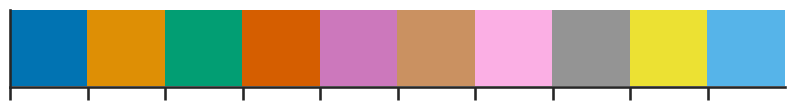

In [12]:
colors=sns.color_palette('colorblind')
sns.palplot(colors)

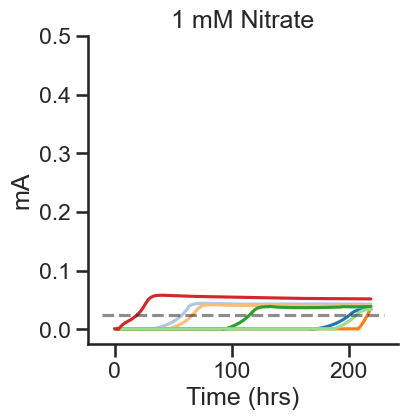

<Figure size 640x480 with 0 Axes>

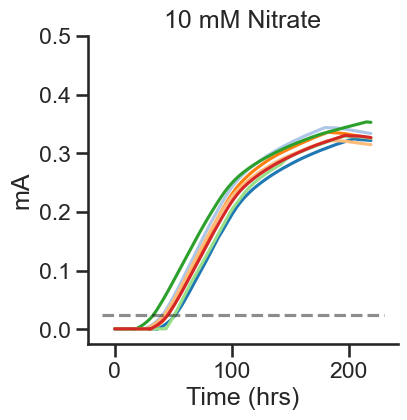

<Figure size 640x480 with 0 Axes>

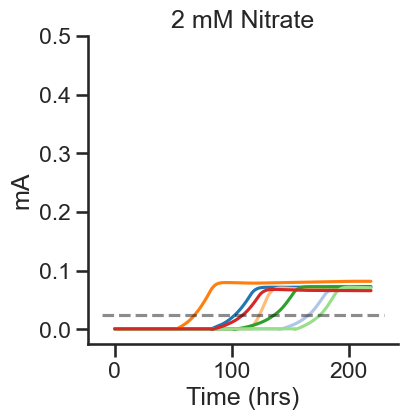

<Figure size 640x480 with 0 Axes>

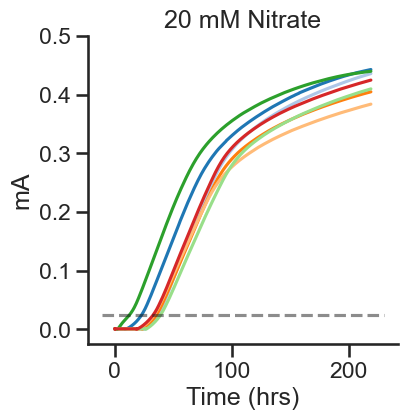

<Figure size 640x480 with 0 Axes>

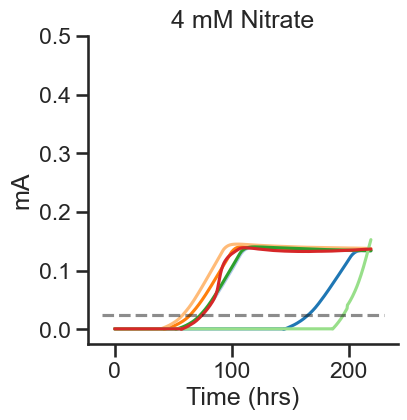

<Figure size 640x480 with 0 Axes>

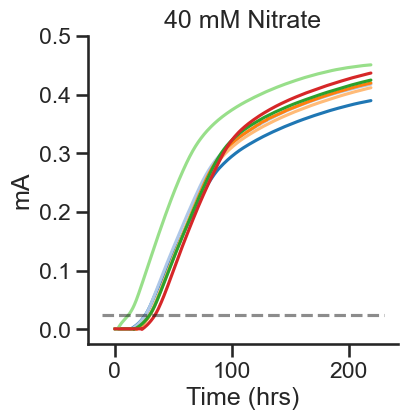

<Figure size 640x480 with 0 Axes>

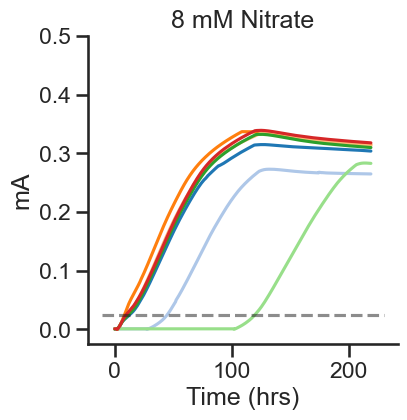

<Figure size 640x480 with 0 Axes>

In [13]:
from scipy.stats import linregress
colors=sns.color_palette('tab20',12)
lags={}
maxOD={}
for media,df in mapped.groupby(by='media'):
    if media =='Empty':
        break
    plt.figure(figsize=(4,4))
    plt.title(media)
    lags[media]=[]
    maxOD[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9':
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']] 
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        y3=y3-y3[0]
        y3[y3<=0]=0.001
        if len(x2[y3>.025]) > 0:
            lag=x2[y3>.025][0]
        else:
            lag=x2[-1]
        lags[media].append(lag)
        maxOD[media].append(y3.max())
        #y2=y2/y2.max()
        plt.plot(x2,y3,color=colors[i])
        i+=1
    plt.xlabel('Time (hrs)')
    plt.ylabel('mA')
    plt.ylim(-.025,.5)
    plt.plot(plt.xlim(),(.025,.025),'k--',alpha=0.5)
    plt.show()
    plt.clf()

Text(0, 0.5, 'Lag Standard Dev (hrs)')

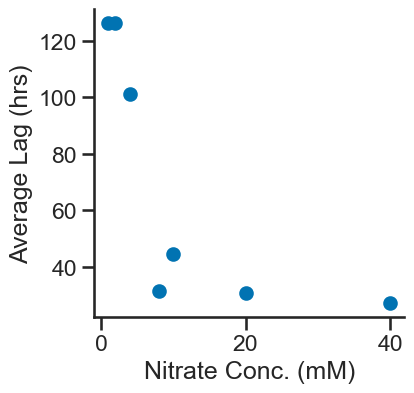

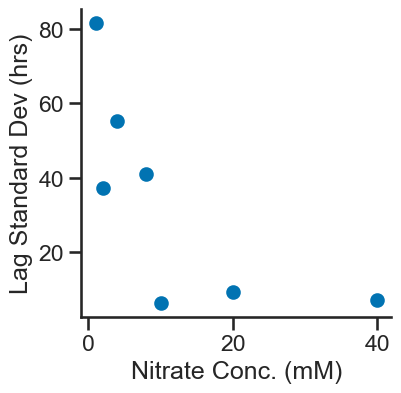

In [14]:
df=pd.DataFrame(lags)
mean=df.mean().reset_index()
mean['conc']=[float(x.split()[0]) for x in mean['index']]
mean.columns=['cond','lag','conc']
plt.figure(figsize=(4,4))
plt.scatter(mean.conc,mean.lag)
plt.xlabel('Nitrate Conc. (mM)')
plt.ylabel('Average Lag (hrs)')


var=df.std().reset_index()
var['conc']=[float(x.split()[0]) for x in var['index']]
var.columns=['cond','lag','conc']
plt.figure(figsize=(4,4))
plt.scatter(var.conc,var.lag)
plt.xlabel('Nitrate Conc. (mM)')
plt.ylabel('Lag Standard Dev (hrs)')

Text(0, 0.5, 'Average Lag (hrs)')

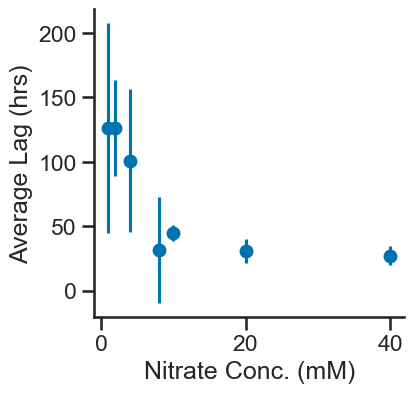

In [15]:
plt.figure(figsize=(4,4))
plt.errorbar(mean.conc,mean.lag,var.lag,ls='none',marker='o')
plt.xlabel('Nitrate Conc. (mM)')
plt.ylabel('Average Lag (hrs)')


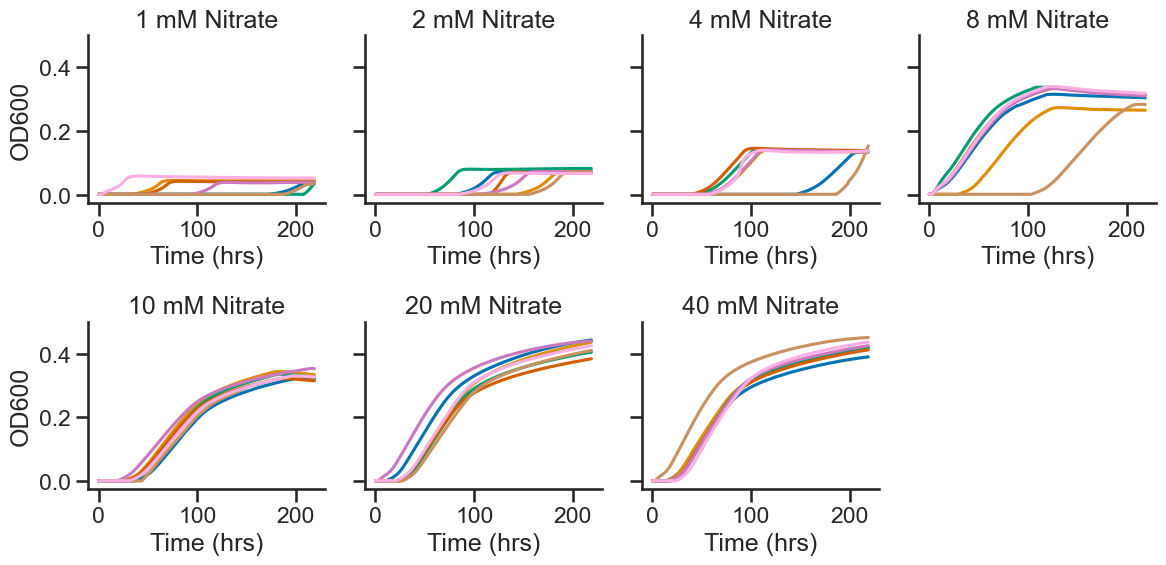

In [16]:
colors=sns.color_palette('colorblind',9)
maxOD={}
fig= plt.figure(figsize=(12,6))
trash=[('5 mM Nitrite', '4')]
j=1
res=pd.DataFrame()
for media in ['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']:
    df = mapped[mapped.media==media]
    if media =='Empty':
        break
    ax=fig.add_subplot(2,4,j)
    ax.set_title(media)
    lags[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9' or (media,rep) in trash:
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']] 
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        y3=y3-y3[0]
        y3[y3<=0]=0.001
        ax.plot(x2,y3,color=colors[i])
        i+=1

     
        od=pd.DataFrame([x2,y3]).T
        od.columns=['Time (hrs)','OD600']
        od['media']=media
        od['replicate']=rep
        res=pd.concat([res,od])
    plt.ylim(-.025,.5)
    if j != 1 and j != 5:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('OD600')
    ax.set_xlabel('Time (hrs)')
    j+=1
    
plt.tight_layout()
#plt.savefig('R12-ODin-OD600.png',dpi=250,bbox_inches='tight')

(-0.01, 0.5)

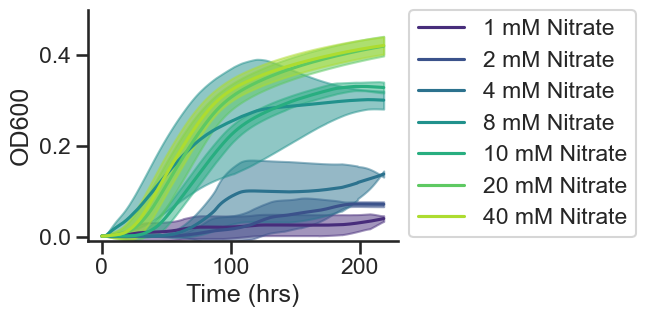

In [18]:
res.replicate=res.replicate.astype(int)
mean=res.groupby(by=['media','Time (hrs)']).mean()
std=res.groupby(by=['media','Time (hrs)']).std()
conditions=['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']
colors=sns.color_palette('viridis',7)
plt.figure(figsize=(4,3))
i=0
for idx in conditions:
    
    df=mean.loc[idx].reset_index()
    #df['OD600']=df['OD600']-df['OD600'].min()
    err=std.loc[idx].reset_index()
    plt.plot(df['Time (hrs)'],df['OD600'],label=idx,color=colors[i])
    plt.fill_between(df['Time (hrs)'].values,df['OD600'].values-err['OD600'].values,df['OD600'].values+err['OD600'].values,alpha=0.5,color=colors[i])
   
    i+=1
plt.xlabel('Time (hrs)')
plt.ylabel('OD600')
plt.legend(bbox_to_anchor=(1,1.05),loc=2)

#plt.yscale('log')
#plt.xlim(0,50)
plt.ylim(-.01,0.5)
#plt.yscale('log')
#plt.ylim(10**-3,2*10**-1)
#plt.savefig('R12-N03-yield.pdf',bbox_inches='tight')

Text(0.5, 1.0, 'R12')

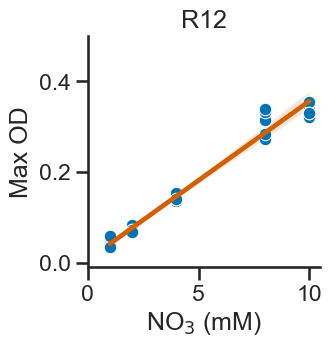

In [19]:
maxod=res.groupby(by=['media','replicate']).max().reset_index()
maxod['nitrate']=[float(x.split()[0]) for x in maxod.media]
plt.figure(figsize=(3,3))
sns.regplot(x='nitrate',y='OD600',data=maxod[maxod.nitrate<=10],scatter=False,color='r')
sns.scatterplot(x='nitrate',y='OD600',data=maxod[maxod.nitrate<=10])
plt.ylim(-.01,0.5)
plt.xlim(0,10.5)
plt.xlabel('NO$_3$ (mM)')
plt.ylabel('Max OD')
plt.title('R12')
#plt.savefig('R12-NO3-maxOD-v2.pdf',bbox_inches='tight')

In [52]:
data=pd.read_csv('data/12M23D.CSV',header=None).iloc[1:,:-1].drop(1,axis=1)
time=pd.to_datetime(data[0])
hrs=(time-time[1]).values.astype('float')/10**9/3600
data.index=hrs
data.index.name='Time (hrs)'
data=data.drop(0,axis=1)

data.columns=['%s%s'%(i,j) for i in 'ABCDEFGH' for j in range(1,9) ]
data

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,...,G7,G8,H1,H2,H3,H4,H5,H6,H7,H8
Time (hrs),,,,,,,,,,,,,,,,,,,,,
0.000000,3241,3370,3570,1599,1618,1588,1605,1614,1598,1582,...,1620,1590,1590,1591,1608,1598,1603,1599,1596,1585
0.335556,3220,3328,3532,1578,1620,1517,1534,1584,1567,1559,...,1605,1577,1609,1620,1620,1616,1624,1616,1600,1634
0.668889,3213,3301,3502,1568,1541,1477,1493,1555,1555,1558,...,1594,1566,1616,1613,1617,1602,1622,1620,1596,1643
1.002222,3184,3264,3458,1551,1540,1443,1442,1522,1527,1539,...,1570,1545,1576,1598,1594,1579,1601,1599,1578,1632
1.335556,3186,3263,3461,1561,1510,1425,1438,1515,1531,1575,...,1574,1546,1578,1605,1595,1581,1610,1606,1582,1640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299.025000,4026,4572,6290,5310,6563,11706,12162,1384,2458,2346,...,6788,1470,4224,2892,4148,6432,7423,8727,8873,1814
299.358333,4030,4578,6293,5112,6566,11715,12166,1389,2463,2350,...,6795,1465,4232,2916,4151,6438,7423,8733,8878,1815
299.691667,4031,4578,6295,5112,6567,11715,12171,1388,2465,2351,...,6795,1459,4233,2895,4149,6432,7422,8734,8880,1814


In [24]:
layout=pd.read_excel('data/ODin_Tube_Map Repeat.xlsx',sheet_name='Layout')
layout=layout.dropna()
layout.index=layout.Position
layout.drop('Position',axis=1,inplace=True)
layout_dict=layout.to_dict()['Condition']
layout_dict

{'A1': 'A1',
 'A2': 'B1',
 'A3': 'C1',
 'A4': 'D1',
 'A5': 'E1',
 'A6': 'F1',
 'A7': 'G1',
 'A8': 'A9',
 'B1': 'A2',
 'B2': 'B2',
 'B3': 'C2',
 'B4': 'D2',
 'B5': 'E2',
 'B6': 'F2',
 'B7': 'G2',
 'B8': 'B9',
 'C1': 'A3',
 'C2': 'B3',
 'C3': 'C3',
 'C4': 'D3',
 'C5': 'E3',
 'C6': 'F3',
 'C7': 'G3',
 'C8': 'C9',
 'D1': 'A4',
 'D2': 'B4',
 'D3': 'C4',
 'D4': 'D4',
 'D5': 'E4',
 'D6': 'F4',
 'D7': 'G4',
 'D8': 'D9',
 'E1': 'A5',
 'E2': 'B5',
 'E3': 'C5',
 'E4': 'D5',
 'E5': 'E5',
 'E6': 'F5',
 'E7': 'G5',
 'E8': 'E9',
 'F1': 'A6',
 'F2': 'B6',
 'F3': 'C6',
 'F4': 'D6',
 'F5': 'E6',
 'F6': 'F6',
 'F7': 'G6',
 'F8': 'F9',
 'G1': 'A7',
 'G2': 'B7',
 'G3': 'C7',
 'G4': 'D7',
 'G5': 'E7',
 'G6': 'F7',
 'G7': 'G7',
 'G8': 'G9',
 'H1': 'A8',
 'H2': 'B8',
 'H3': 'C8',
 'H4': 'D8',
 'H5': 'E8',
 'H6': 'F8',
 'H7': 'G8'}

In [25]:
ODs=pd.read_excel('data/ODin_Tube_Map Repeat.xlsx',sheet_name='ODs',index_col=0)
ODs

,OD1,OD2
Condition,,
A1,0.015,0.053
A2,0.02,0.064
A3,0.014,0.049
A4,0.017,0.048
A5,0.014,0.052
...,...,...
G6,0.02,0.414
G7,0.018,0.416
G8,0.019,0.430


In [26]:
media=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='Conditions'
                   )
media.index=media.Condition
media_dict=media.Media.to_dict()
media_dict

{'A': '1 mM Nitrate',
 'B': '2 mM Nitrate',
 'C': '4 mM Nitrate',
 'D': '8 mM Nitrate',
 'E': '10 mM Nitrate',
 'F': '20 mM Nitrate',
 'G': '40 mM Nitrate'}

In [27]:
condition_dict={}
for key in layout_dict:
    item=layout_dict[key]
    if '11' in item or '12' in item:
        cond = media_dict[item[0]] + ',Blank'
    else:
        cond = media_dict[item[0]] + ',Rep%s'%(item[1:])
    condition_dict[key]=cond
condition_dict

{'A1': '1 mM Nitrate,Rep1',
 'A2': '2 mM Nitrate,Rep1',
 'A3': '4 mM Nitrate,Rep1',
 'A4': '8 mM Nitrate,Rep1',
 'A5': '10 mM Nitrate,Rep1',
 'A6': '20 mM Nitrate,Rep1',
 'A7': '40 mM Nitrate,Rep1',
 'A8': '1 mM Nitrate,Rep9',
 'B1': '1 mM Nitrate,Rep2',
 'B2': '2 mM Nitrate,Rep2',
 'B3': '4 mM Nitrate,Rep2',
 'B4': '8 mM Nitrate,Rep2',
 'B5': '10 mM Nitrate,Rep2',
 'B6': '20 mM Nitrate,Rep2',
 'B7': '40 mM Nitrate,Rep2',
 'B8': '2 mM Nitrate,Rep9',
 'C1': '1 mM Nitrate,Rep3',
 'C2': '2 mM Nitrate,Rep3',
 'C3': '4 mM Nitrate,Rep3',
 'C4': '8 mM Nitrate,Rep3',
 'C5': '10 mM Nitrate,Rep3',
 'C6': '20 mM Nitrate,Rep3',
 'C7': '40 mM Nitrate,Rep3',
 'C8': '4 mM Nitrate,Rep9',
 'D1': '1 mM Nitrate,Rep4',
 'D2': '2 mM Nitrate,Rep4',
 'D3': '4 mM Nitrate,Rep4',
 'D4': '8 mM Nitrate,Rep4',
 'D5': '10 mM Nitrate,Rep4',
 'D6': '20 mM Nitrate,Rep4',
 'D7': '40 mM Nitrate,Rep4',
 'D8': '8 mM Nitrate,Rep9',
 'E1': '1 mM Nitrate,Rep5',
 'E2': '2 mM Nitrate,Rep5',
 'E3': '4 mM Nitrate,Rep5',
 'E4': '

In [53]:
mapped=data.copy()
mapped=mapped.stack().reset_index()
mapped.columns=['Time (hrs)','Layout','mA']
mapped['Condition']=mapped.Layout.map(condition_dict).fillna('Empty')
mapped

mapped['OD1']=np.nan
mapped['OD2']=np.nan
for i in mapped.index:
    pos = mapped.loc[i,'Layout']
    if pos in layout_dict:
        mapped.loc[i,['OD1','OD2']]=ODs.loc[layout_dict[pos]].values
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2
0,0.000000,A1,3241,"1 mM Nitrate,Rep1",0.015,0.053
1,0.000000,A2,3370,"2 mM Nitrate,Rep1",0.020,0.076
2,0.000000,A3,3570,"4 mM Nitrate,Rep1",0.023,0.132
3,0.000000,A4,1599,"8 mM Nitrate,Rep1",0.020,0.269
4,0.000000,A5,1618,"10 mM Nitrate,Rep1",0.023,0.322
...,...,...,...,...,...,...
57723,300.358333,H4,6433,"8 mM Nitrate,Rep8",0.020,0.273
57724,300.358333,H5,7420,"10 mM Nitrate,Rep8",0.018,0.340
57725,300.358333,H6,8741,"20 mM Nitrate,Rep8",0.021,0.410
57726,300.358333,H7,8880,"40 mM Nitrate,Rep8",0.019,0.430


In [58]:
reps=[]
conds=[]
for i in mapped.Condition:
    j=i.split(',')[0]
    if i != 'Empty':
        i=i.split(',')[1][3:]
    else:
        i=np.nan
    reps.append(i)
    conds.append(j)
mapped['media']=conds
mapped['replicate']=reps

#mapped=mapped[~mapped.Layout.isin(['H'+str(i) for i in range(1,9)])]
mapped=mapped.dropna()
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2,media,replicate
0,0.000000,A1,3241,"1 mM Nitrate,Rep1",0.015,0.053,1 mM Nitrate,1
1,0.000000,A2,3370,"2 mM Nitrate,Rep1",0.020,0.076,2 mM Nitrate,1
2,0.000000,A3,3570,"4 mM Nitrate,Rep1",0.023,0.132,4 mM Nitrate,1
3,0.000000,A4,1599,"8 mM Nitrate,Rep1",0.020,0.269,8 mM Nitrate,1
4,0.000000,A5,1618,"10 mM Nitrate,Rep1",0.023,0.322,10 mM Nitrate,1
...,...,...,...,...,...,...,...,...
57722,300.358333,H3,4146,"4 mM Nitrate,Rep8",0.020,0.144,4 mM Nitrate,8
57723,300.358333,H4,6433,"8 mM Nitrate,Rep8",0.020,0.273,8 mM Nitrate,8
57724,300.358333,H5,7420,"10 mM Nitrate,Rep8",0.018,0.340,10 mM Nitrate,8
57725,300.358333,H6,8741,"20 mM Nitrate,Rep8",0.021,0.410,20 mM Nitrate,8


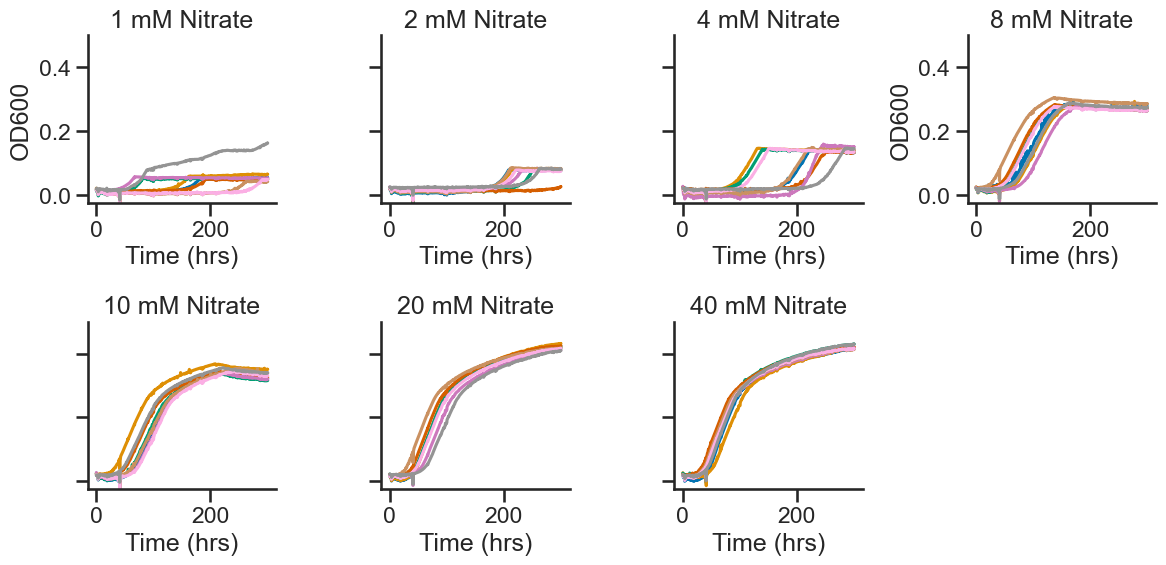

In [62]:
colors=sns.color_palette('colorblind',9)
maxOD={}
fig= plt.figure(figsize=(12,6))
trash=[('5 mM Nitrite', '4')]
j=1
res=pd.DataFrame()
for media in ['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']:
    df = mapped[mapped.media==media]
    if media =='Empty':
        break
    ax=fig.add_subplot(2,4,j)
    ax.set_title(media)
    lags[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9' or (media,rep) in trash:
            continue

        ewm=df2[['Time (hrs)','OD1','OD2','mA']].ewm(span = 1).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        
        ax.plot(x2,y3,color=colors[i])
        i+=1

     
        od=pd.DataFrame([x2,y3]).T
        od.columns=['Time (hrs)','OD600']
        od['media']=media
        od['replicate']=rep
        res=pd.concat([res,od])
    plt.ylim(-.025,.5)
    if j != 1 and j != 4:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('OD600')
    ax.set_xlabel('Time (hrs)')
    j+=1
    
plt.tight_layout()
#plt.savefig('R12-ODin-OD600.png',dpi=250,bbox_inches='tight')

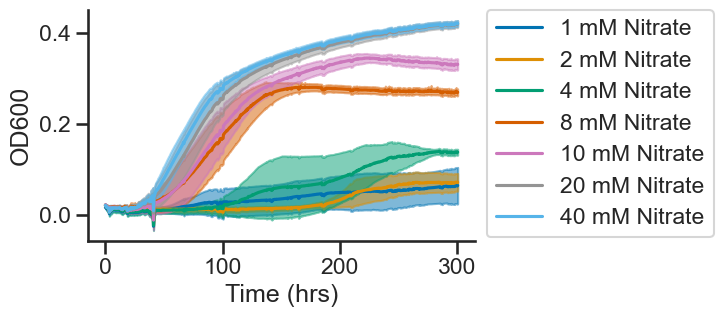

In [71]:
mean=res.drop('replicate',axis=1).groupby(by=['media','Time (hrs)']).mean()
std=res.drop('replicate',axis=1).groupby(by=['media','Time (hrs)']).std()
conditions=['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']
colors=sns.color_palette('colorblind')
colors=[colors[0],colors[1],colors[2],colors[3],colors[4],colors[7],colors[9]]
plt.figure(figsize=(5,3))
i=0
for idx in conditions:
    
    df=mean.loc[idx].reset_index()
    #df['OD600']=df['OD600']-df['OD600'].min()
    err=std.loc[idx].reset_index()
    plt.plot(df['Time (hrs)'],df['OD600'],label=idx,color=colors[i])
    plt.fill_between(df['Time (hrs)'].values,df['OD600'].values-err['OD600'].values,df['OD600'].values+err['OD600'].values,alpha=0.5,color=colors[i])
   
    i+=1
plt.xlabel('Time (hrs)')
plt.ylabel('OD600')
plt.legend(bbox_to_anchor=(1,1.05),loc=2)
plt.savefig('R12-Nitrate-Yield.png',dpi=500,bbox_inches='tight')
#plt.yscale('log')
#plt.ylim(10**-3,2*10**-1)

In [72]:
gc_data=pd.read_csv('data/GC_Data.csv')
gc_data.Sample = gc_data.Sample.map(layout_dict)
gc_data=pd.merge(mapped[['Layout','media','OD1','OD2','replicate']],gc_data,left_on='Layout',right_on='Sample').drop('Layout',axis=1).drop_duplicates()
gc_data['nitrate']=[int(x.split()[0]) for x in gc_data.media]
gc_data['Nitrous oxide (mM)']=gc_data['Nitrous Oxide']*0.02059220973240205-0.05817653391874167
gc_data

,media,OD1,OD2,replicate,Sample,Nitrous Oxide,nitrate,Nitrous oxide (mM)
0,1 mM Nitrate,0.015,0.053,1,A1,0.000,1,-0.058177
1,2 mM Nitrate,0.020,0.076,1,A2,60.208,2,1.181639
2,4 mM Nitrate,0.023,0.132,1,A3,108.355,4,2.173092
3,8 mM Nitrate,0.020,0.269,1,A4,239.464,8,4.872916
4,10 mM Nitrate,0.023,0.322,1,A5,290.643,10,5.926805
5,20 mM Nitrate,0.019,0.424,1,A6,378.373,20,7.733360
6,40 mM Nitrate,0.018,0.416,1,A7,207.062,40,4.205688
7,1 mM Nitrate,0.020,0.064,2,B1,0.000,1,-0.058177
8,2 mM Nitrate,0.021,0.077,2,B2,67.564,2,1.333116
9,4 mM Nitrate,0.020,0.138,2,B3,117.554,4,2.362520


(0.0, 11.0)

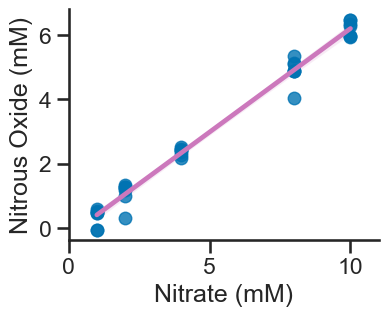

In [73]:

plt.figure(figsize=(4,3))
sns.regplot(x='nitrate',y='Nitrous oxide (mM)',scatter=False,color=colors[-3],data=gc_data[gc_data.nitrate<=10])
sns.regplot(x='nitrate',y='Nitrous oxide (mM)',fit_reg=False,color=colors[0],data=gc_data[gc_data.nitrate<=10])
plt.xlabel('Nitrate (mM)')
plt.ylabel('Nitrous Oxide (mM)')
plt.xlim(0,11)